In [ ]:
#@title [Candidature form]

Name = '' #@param {type: "string"}
Matriculation_number = '' #@param {type:"string"}
Faculty = ''  #@param {type: "string"}
Course = '' #@param {type:"string"}
Current_semester = "" #@param ["1", "2", "3", "4", "5", "6", "7"] {allow-input: true}

# Deep Neural Network with Keras and TensorFlow 2.4.1 
## Machine Learning Project - 03 
This project is created and adapted as a Jupyter notebook for [**MME 26849: "Fundamentals of Deep Learning and TinyML"**](https://felix.hs-furtwangen.de/url/RepositoryEntry/4020862983) by the course instructors [Marcus Rüb](https://linkedin.com/in/marcus-rüb-3b07071b2) and [Ajay Krishna](https://linkedin.com/in/ajay-krishna-2031a5119).

## Resouces
Slide from lecture:
[04 - Neural Networks](https://github.com/r1marcus/Fundamentals-of-Deep-Learning-HFU/blob/main/Slides/04%20-%20neural%20networks/Neuralnetworks.pptx)

## Goal of the project
Implementation of a deep neural network using [Keras](https://keras.io/) created by [François Chollet](https://twitter.com/fchollet?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) (my favourite french researcher, psst!) and [TensorFlow](https://www.tensorflow.org/) to extract, examine, analyze, train, and predict on Fashion-MNIST dataset. 


## Import libraries 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
print(tf.__version__)

2.4.1


### **How boring it is run these notebooks without some gossip/rival stories in between code cells?**

In the long history of tech rivalries, rarely has there been a battle as competitive as the raging war between **Google** and **Facebook** from their basic ad revenue business models to becoming the AI giants of the future.

In 2015, TensorFlow was created by the **Google Brain** team led by [Andrew Ng](https://twitter.com/AndrewYNg), professor at Stanford University and Co-Founder of Coursera. 

Due to the immense popularity of TensorFlow, **Facebook's AI Research Lab (FAIR)** developed a similar open-source machine learning library led by [Yann LeCun](https://twitter.com/ylecun) and called it [PyTorch](https://pytorch.org/blog/a-year-in/) in 2016. 

Since then, there is this million dollar question "*Is TensorFlow better than PyTorch or vice-versa?*" in the community. 

I personally love **TensorFlow** and so does the developers at Youtube, Uber, Intel, Snapchat, Twitter, Siemens, SAP, and Airbus do but that doesn't mean **PyTorch** is less popular because the complete distributed training of Tesla's Autopilot architechture is running on PyTorch.



# Download data: Fashion-MNIST

Fashion-MNIST is one of the standard dataset of [Zalando's](https://en.zalando.de/?_rfl=de) article images - consisting of 60,000 training examples and 10,000 test examples that is used in computer vision's clothing classification problem.

With every project dealing with neural networks, you need a dataset to work with.

 Typically, you split the dataset into two: **Training Set** and **Test Set**. Use the Training Set to train weights and biases of the neural network by presenting the network with labeled examples. Labeled examples provide the supervision required for the network to train its weights and biases. This process of training is often referred to as **Supervised Learning**.

Let us download the Fashion MNIST dataset for this project.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(trImages, trLabels), (tImages, tLabels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Let's understand the dimensions of the downloaded dataset.

In [5]:
print("--------------------------")
print("Dimensions of Train Set")
print("Dimension(trImages)=",np.shape(trImages))
print("There are", np.shape(trImages)[0], "images where each image is", np.shape(trImages)[1:], "in size")
print("There are", np.shape(np.unique(tLabels))[0], "unique image labels")
print("--------------------------")
print("Dimensions of Test Set")
print("Dimension(tImages)=",np.shape(tImages), "Dimension(tLabels)=", np.shape(tLabels)[0])
print("--------------------------")

--------------------------
Dimensions of Train Set
Dimension(trImages)= (60000, 28, 28)
There are 60000 images where each image is (28, 28) in size
There are 10 unique image labels
--------------------------
Dimensions of Test Set
Dimension(tImages)= (10000, 28, 28) Dimension(tLabels)= 10000
--------------------------


Let's understand the images and what they would look like.

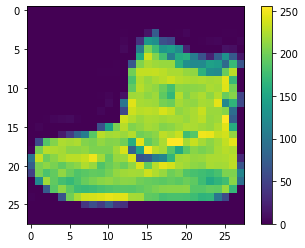

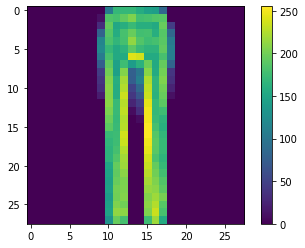

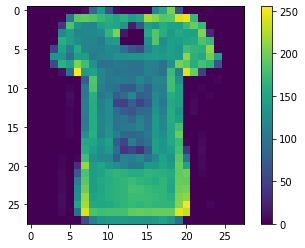

In [18]:
plt.figure(1)
plt.imshow(trImages[0]) # plotting an image
plt.colorbar()
plt.grid(False)
plt.draw()

plt.figure(2)
plt.imshow(trImages[69])
plt.colorbar()
plt.grid(False)
plt.draw()

plt.figure(3)
plt.imshow(trImages[444])
plt.colorbar()
plt.grid(False)
plt.draw()

We see that pixels of an image can take values from 0 to 255. For this exercise, we will normalize pixel values by 256, i.e., resultant values will be between 0 and 1 (but including).

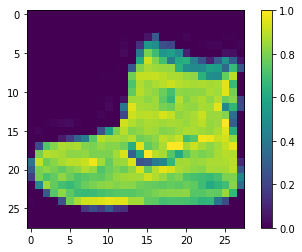

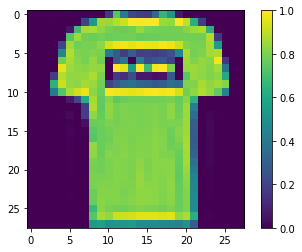

In [19]:
# Preprocess train images
trImages = trImages/255
tImages = tImages/255

# Plot samples of prepprocessed images
plt.figure(1)
plt.imshow(trImages[0]) # plotting an image
plt.colorbar()
plt.grid(False)
plt.draw()

plt.figure(2)
plt.imshow(trImages[1])
plt.colorbar()
plt.grid(False)
plt.draw()

# Build Neural Network

Let us build a neural network one layer at a time. 


---


* The first layer takes in images as input; we will flatten or linearize pixel values in an image and feed them to the input layer. 

* The second layer contains 128 units and each unit will connect through an edge to every unit in the input layer. 

* The third layer contains 10 units (one each for each unique label) and each unit in the third/output layer connects to every unit in the second layer.

* Typically, each unit is associated with a **Bias** value and each edge is associated with a **Weight** value. Each unit is a computation engine that aggregates messages coming in and applies a non-linear function (referred to as **activation** function) on the aggregation.

In [21]:
model = tf.keras.Sequential() # Sequential model

nBatchSize = 4 # play with this, you can set it to 1, 32, 64, or as big as size of train images
layer0 = tf.keras.layers.Flatten(input_shape=np.shape(trImages[0]),batch_size=nBatchSize) # linearizing input matrix into an array
model.add(layer0)

layer1 = tf.keras.layers.Dense(units=128,activation=tf.nn.relu)
model.add(layer1)

layer2 = tf.keras.layers.Dense(units=10,activation=tf.nn.softmax)
model.add(layer2)

model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Having built and compiled the model, we will examine the various components of the model. 

In [24]:
print("Layer-0:")
print("\t","Shape of images =", layer0.input_shape, "flattened to", layer0.output_shape)
print("\t","Number of weights+bias=",layer0.count_params())
print("")
print("Layer-1:")
print("\t","Shape of input layer =",layer1.input_shape, "Shape of output layer=",layer1.output_shape)
print("\t","Number of weights+bias=",layer1.count_params())
print("")
print("Layer-2:")
print("\t","Shape of input layer =",layer2.input_shape, "Shape of output layer=",layer2.output_shape)
print("\t","Number of weights+bias=",layer2.count_params())
print("")

print("Total number of parameters, i.e., weights+bias, in the model=", model.count_params())

Layer-0:
	 Shape of images = (4, 28, 28) flattened to (4, 784)
	 Number of weights+bias= 0

Layer-1:
	 Shape of input layer = (4, 784) Shape of output layer= (4, 128)
	 Number of weights+bias= 100480

Layer-2:
	 Shape of input layer = (4, 128) Shape of output layer= (4, 10)
	 Number of weights+bias= 1290

Total number of parameters, i.e., weights+bias, in the model= 101770


#Train Neural Network

To train a neural network, we present images in Train Set and their corresponding labels to the network. 

Given the batch size is set to 4, weights and bias(es) of the network are adjusted (or adapted) after processing 4 images. This process continues until we exhaust through all 60,000 images in Train Set and this constitutes an **Epoch**. 

Here we will run 5 epochs as seen in the code snippet below.

In [25]:
trHistory = model.fit(trImages,trLabels,epochs=5,batch_size=nBatchSize)

Epoch 1/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.5895 - accuracy: 0.7899
Epoch 2/5
15000/15000 [==============================] - 27s 2ms/step - loss: 0.3867 - accuracy: 0.8617
Epoch 3/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.3400 - accuracy: 0.8763
Epoch 4/5
15000/15000 [==============================] - 25s 2ms/step - loss: 0.3194 - accuracy: 0.8832
Epoch 5/5
15000/15000 [==============================] - 26s 2ms/step - loss: 0.3085 - accuracy: 0.8868


In [26]:
print("Train Parameters")
print("\t", trHistory.params)
print("Train History")
print("\t", trHistory.history)



Train Parameters
	 {'verbose': 1, 'epochs': 5, 'steps': 15000}
Train History
	 {'loss': [0.47999152541160583, 0.3726887106895447, 0.34121203422546387, 0.3217324912548065, 0.30957135558128357], 'accuracy': [0.8268333077430725, 0.8652666807174683, 0.8745833039283752, 0.8821333050727844, 0.8861500024795532]}


As part of history, we observe how "loss" and "accuracy" has changes across epochs. We should also expect "loss" to drop with every epoch and "accuracy" to increase with every epoch.

Below, we will review the weights and bias(es) obtained from the training. 

In the plot capturing weights between Layer0 to Layer1, there are 128 curves corresponding to 128 units in Layer1 and each curve contains 784 weights. The second plot captures 128 Bias values corresponding to 128 units in Layer1 (or the second layer).

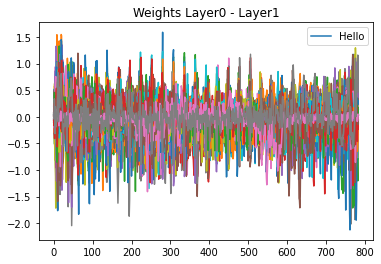

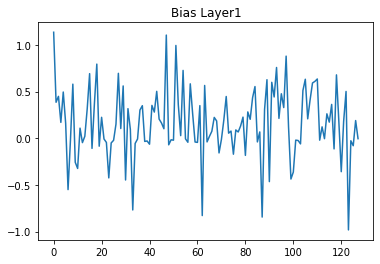

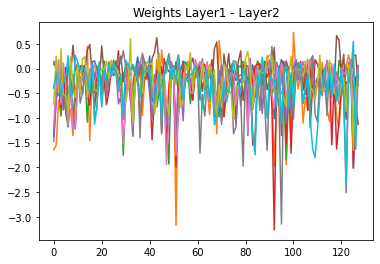

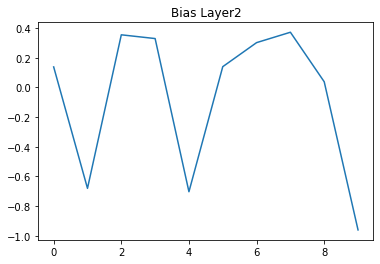

In [28]:
# Plot trained weights and bias(es)
plt.figure()
plt.plot(layer1.get_weights()[0])
plt.title("Weights Layer0 - Layer1")
plt.legend(['Hello'])
plt.draw()
plt.figure()
plt.plot(layer1.get_weights()[1])
plt.title("Bias Layer1")
plt.draw()
plt.figure()
plt.plot(layer2.get_weights()[0])
plt.title("Weights Layer1 - Layer2")
plt.draw()
plt.figure()
plt.plot(layer2.get_weights()[1])
plt.title("Bias Layer2")
plt.draw()

#Classify with Neural Network

Having trained weights and bias(es) of the network, use them to classify Test images into one of 10 categories. By running the code below you will find that the neural network is able to classify images in Test set with an accuracy of 87.2%. 

For each image presented to the network, output of the 10 units is recorded as rows of the `predictions` array.

In [29]:
predictions = model.predict(tImages,batch_size=nBatchSize,verbose=1) # predictions is a matrix of 10000 x 10, where 10 is the size of the output layer
nCorrect = 0
for i in range(np.shape(predictions)[0]): # process one row at a time
  predictedIndex = predictions[i].argmax()
  trueIndex = tLabels[i]
  nCorrect = nCorrect + (trueIndex==predictedIndex)
print("# Correct Predictions=", nCorrect, "% Correct=", 100*nCorrect/np.shape(predictions)[0])

2500/2500 [==============================] - 2s 805us/step
# Correct Predictions= 8684 % Correct= 86.84


This means that in a test set consisting of 10,000 examples, 8684 were predicted correctly.

# Summary

Keras and Tensorflow has made it simple to set up, train, and predict with a neural network. In addition, we have explored ways to extract, examine, and analyze various aspects of the network.